# Tests of the code
This notebook is designed to document some simple tests of the photon-ALP propagation code ALPro. Most of these tests can be run by running 

```
python -m unittest alpro.test
```

from the command line. 

In [1]:
%matplotlib inline
import alpro 
import matplotlib.pyplot as plt
alpro.util.set_default_plot_params()

## 1. Single Domain Test
First, let's compare an idealised pure polarization state solution to the analytic solution given by

$$ 
P_{\gamma \rightarrow a} = 
\frac{\Theta^2}{1+\Theta^2} 
\sin^2 (\Delta_{\rm eff} 
\sqrt{1+\Theta^2} L),
$$
where
$$
\Theta=2B_\perp E g_{a \gamma}/m_{\rm eff}^2
$$
and 
$$
\Delta_{\rm eff}=m_{\rm eff}^2 L / (4E)
$$
where $m_{\rm eff}^2=m_a^2-\omega_{\rm pl}^2$.

The model here is a single domain of width $10~{\rm kpc}$, with uniform field $B=10 \mu{\rm G}$ oriented along the $y$-axis. The polarization state is $(0,1,0)$ and we use energies from $1-10~{\rm keV}$. 

This test also checks for agreement within a relative tolerance of $10^{-6}$ between the theoretical and numerical calculations. 

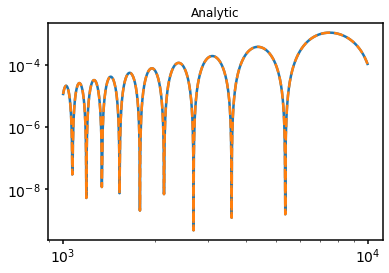

In [2]:
test = alpro.test.RunTest()
test.test_analytic(subplot=111)

## 2. Discretisation Test
In our second test, we repeat the above test, but now compare a single domain to a discretised uniform field. Specifically the result from 1 uniform cell of size $L$ to $10$ uniform cells of size $L/10$. This should give an identical result. The parameters and procedure are identical to our first test. 

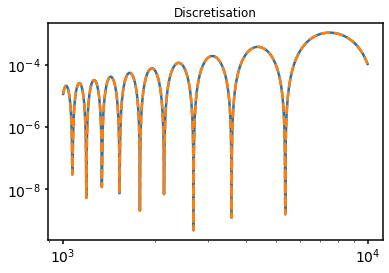

In [3]:
test.test_discretise(subplot=111)

## 3. Libanov field model v Marsh 
This tests a uniform field model from [Libanov \& Troitsky (2021)](https://www.sciencedirect.com/science/article/pii/S0370269320300563?via%3Dihub), which is originally described by [Gourgouliatos et al. (2010)](https://arxiv.org/abs/1008.5353), against M. C. David Marsh's code. This test uses a large scale uniform field and energies in the GeV regime. The field components are given by 

$$
B_r = \frac{2 \cos\theta}{r^2} f(r) \\
B_\theta = - \frac{\sin \theta}{r} f'(r)  \\
B_\phi = \frac{\alpha \sin \theta}{r} f(r) \, ,
$$

where $\alpha$ solves a transcendental equation and is approximately given by  $\alpha= 5.76$. The function $f(r)$ is given by

$$
f(r) =c_1\Big(
\alpha \cos (\alpha u) - \frac{\sin(\alpha u)}{u}
- u^2\left(
\alpha \cos\alpha - \sin \alpha
\right)
\Big) \, .
$$

The form of the field is plotted below, before we plot the ALP result. Note that this is now the **survival** probability on a linear axis. We find cosmetically perfect agreement between our results and Marsh. the Libanov results are smoothed with the Fermi response which is presumably the reason for the difference, but the overall form is similar. 

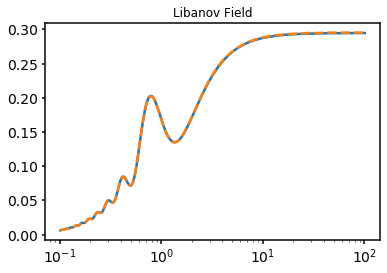

In [4]:
test.test_marsh(subplot=111)

## 4. Massive Fourier Formalism

/Users/matthews/Library/Python/3.7/lib/python/site-packages/alpro/test.py:126: RuntimeWarning: invalid value encountered in greater
  select = (P1 > 1e-7)


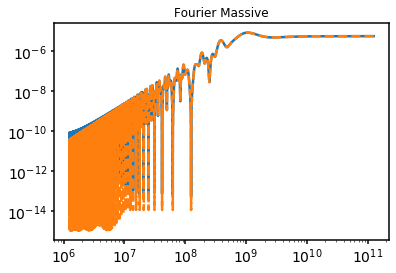

In [5]:
test.test_fourier_massive(subplot=111)

## 5. Massless Fourier Formalism

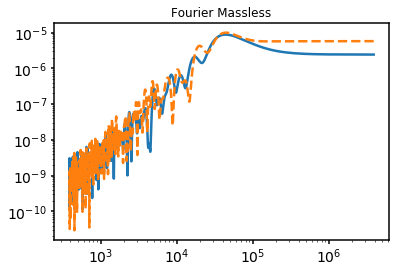

In [6]:
test.test_fourier_massless(subplot=111)

## 6. Domain Field Test v Analytic 
This tests a cell-based domain model against an analytic solution computed by Pierluca Carenza. 

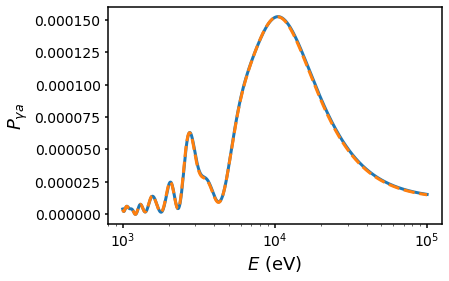

In [7]:
import numpy as np 
def setup_carenza_model():
    s = alpro.Survival("custom")
    s.init_model()
    r, f = np.genfromtxt("../data/Bfield_Carenza.dat", unpack=True)
    s.set_params(g=1e-12 * 1e-9, mass=1e-11)
    s.domain.deltaL = r[1:] - r[:-1]
    s.domain.r = r[:-1]
    s.domain.rcen = 0.5 * (r[1:] + r[:-1])
    s.domain.ne = np.zeros_like(s.domain.r) 
    s.domain.Bx = f[:-1] * 1e-6
    s.domain.By = np.zeros_like (s.domain.Bx)
    s.domain.B = np.sqrt(s.domain.Bx**2  + s.domain.By **2)
    s.domain.phi = np.arctan2(s.domain.Bx,s.domain.By)
    return (s) 

energies,P = np.genfromtxt("../data/Prob_Carenza.dat", unpack=True)

s = setup_carenza_model()
Pcode, _ = s.propagate(s.domain, energies, pol="x")

# make the default plot and overplot Pierluca's solution
s.default_plot()
plt.plot(energies, P, c="C1", ls="--", label="Carenza analytic")

## Additional Tests
I've done a number of other tests - using the code in various regimes in terms of density, energy, magnetic field strength. I've also tested alpro against [gammaALPs](https://github.com/me-manu/gammaALPs), with near identical results in the X-ray regime, but these are not documented here for the moment.  